# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [9]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = '/content/drive/MyDrive/project/'

#### 3) 데이터 읽어오기

In [12]:
data = joblib.load('data2.pkl')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2923 non-null   datetime64[ns]
 1   count            2923 non-null   int64         
 2   submission       2923 non-null   int64         
 3   boarding         2923 non-null   int64         
 4   mean_time        2923 non-null   float64       
 5   mean_fare        2923 non-null   int64         
 6   mean_dis         2923 non-null   int64         
 7   temp_max         2922 non-null   float64       
 8   temp_min         2922 non-null   float64       
 9   rain(mm)         2922 non-null   float64       
 10  humidity_max(%)  2922 non-null   float64       
 11  humidity_min(%)  2922 non-null   float64       
 12  sunshine(MJ/m2)  2922 non-null   float64       
 13  weekday          2923 non-null   category      
 14  month            2923 non-null   categor

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [14]:
data.isna().sum()

Date               0
count              0
submission         0
boarding           0
mean_time          0
mean_fare          0
mean_dis           0
temp_max           1
temp_min           1
rain(mm)           1
humidity_max(%)    1
humidity_min(%)    1
sunshine(MJ/m2)    1
weekday            0
month              0
year               0
season             0
holidays           0
mean_time_rm       6
rates              0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.head()

,Date,count,submission,boarding,mean_time,mean_fare,mean_dis,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,year,season,holidays,mean_time_rm,rates
6,2015-01-07,410,4085,3676,24.7,2230,8646,4.1,-7.4,3.4,98.0,29.0,10.47,2,1,2015,win,0,23.657143,89.987760
7,2015-01-08,419,4030,3728,21.2,2231,8683,-1.0,-8.8,0.0,42.0,24.0,10.12,3,1,2015,win,0,23.371429,92.506203
8,2015-01-09,424,4167,3813,21.8,2215,8506,-0.2,-9.2,0.0,62.0,27.0,10.09,4,1,2015,win,0,24.028571,91.504680
9,2015-01-10,215,1916,1645,41.2,2447,11123,3.2,-6.8,0.0,78.0,38.0,8.74,5,1,2015,win,0,26.171429,85.855950
10,2015-01-11,187,1700,1572,28.8,2419,10806,4.3,-5.5,0.0,81.0,33.0,9.41,6,1,2015,win,0,26.785714,92.470588


### (2) 가변수화

In [17]:
dumm_cols = ['weekday', 'month', 'year', 'season',	'holidays']
data = pd.get_dummies(data, columns=dumm_cols,drop_first=True )

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [18]:
target = 'mean_time'
x = data.drop([target, 'Date'], axis=1)
y = data.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=91, shuffle=False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

### (1) 머신러닝

#### 1) 모델1

In [23]:
model1 = XGBRegressor()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(mean_absolute_error(y_val, pred1))
print(mean_absolute_percentage_error(y_val, pred1))

3.014934099637545
0.07176293430975471


#### 2) 모델2

In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
model2 = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
# alpha: 규제 강도를 조절하는 매개변수, l1_ratio: L1 규제와 L2 규제 비율을 조절하는 매개변수
# max_iter: 최적화 알고리즘의 최대 반복 횟수를 지정하는 매개변수
# random_state: 랜덤 시드를 지정하는 매개변수
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(mean_absolute_error(y_val, pred2))
print(mean_absolute_percentage_error(y_val, pred2))

3.0690515207812292
0.07889733750300186


#### 3) 모델3

In [26]:
from sklearn.svm import SVR

In [27]:
model3 = SVR()
model3.fit(x_train_s, y_train)
pred3 = model3.predict(x_val)
print(mean_absolute_error(y_val, pred3))
print(mean_absolute_percentage_error(y_val, pred3))

5.993584666966037
0.13944479807413618


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


### (2) 딥러닝

In [51]:
import tensorflow as tf 
from tensorflow import keras
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [39]:
x_train_s.shape, x_val_s.shape, y_train.shape, y_val.shape

((2826, 51), (91, 51), (2826,), (91,))

#### 1) 모델1

In [47]:
clear_session()

model4 = Sequential()

model4.add(Input(shape=(51,)))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))

model4.add(Dense(1))

model4.compile(loss='mse', optimizer='adam')

In [48]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1,restore_best_weights=True)

In [49]:
model4.fit(x_train_s, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 753.0450 - val_loss: 85.6083
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 91.1560 - val_loss: 32.8324
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 63.9494 - val_loss: 31.6902
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 54.4488 - val_loss: 25.2902
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 46.8617 - val_loss: 21.7351
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 40.6714 - val_loss: 21.1508
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 37.3300 - val_loss: 21.1052
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 36.4505 - val_loss: 18.5715
Epoch 9/100
71/71 [==============================] - 0s 3ms/step - loss: 33.5890 - val_loss: 20.3943
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss: 31.3252 - val_lo

In [50]:
pred4 = model4.predict(x_val_s)
print(mean_absolute_error(y_val, pred4))
print(mean_absolute_percentage_error(y_val, pred4))

3/3 [==============================] - 0s 4ms/step
4.166872414389809
0.1041963142162345


#### 2) 모델2

In [54]:
clear_session()

model5 = Sequential()

model5.add(Input(shape=(51,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(1))

model5.compile(loss='mse', optimizer='adam')

In [55]:
model5.fit(x_train_s, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/100
71/71 [==============================] - 3s 17ms/step - loss: 422.9030 - val_loss: 48.2029
Epoch 2/100
71/71 [==============================] - 1s 14ms/step - loss: 114.6408 - val_loss: 43.0722
Epoch 3/100
71/71 [==============================] - 1s 14ms/step - loss: 82.4336 - val_loss: 30.7964
Epoch 4/100
71/71 [==============================] - 1s 21ms/step - loss: 72.0879 - val_loss: 24.3877
Epoch 5/100
71/71 [==============================] - 1s 20ms/step - loss: 69.1867 - val_loss: 30.0535
Epoch 6/100
71/71 [==============================] - 1s 19ms/step - loss: 72.4552 - val_loss: 25.0210
Epoch 7/100
71/71 [==============================] - 1s 14ms/step - loss: 63.3525 - val_loss: 25.3790
Epoch 8/100
71/71 [==============================] - 1s 14ms/step - loss: 64.8670 - val_loss: 27.5617
Epoch 9/100
71/71 [==============================] - 1s 14ms/step - loss: 56.7360 - val_loss: 74.1077
Epoch 9: early stopping


In [56]:
pred5 = model5.predict(x_val_s)
print(mean_absolute_error(y_val, pred5))
print(mean_absolute_percentage_error(y_val, pred5))

3/3 [==============================] - 0s 5ms/step
3.699427208533654
0.09130629025994666


## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [57]:
score = [mean_absolute_percentage_error(y_val, pred1),
mean_absolute_percentage_error(y_val, pred2),
mean_absolute_percentage_error(y_val, pred3),
mean_absolute_percentage_error(y_val, pred4),
mean_absolute_percentage_error(y_val, pred5)]

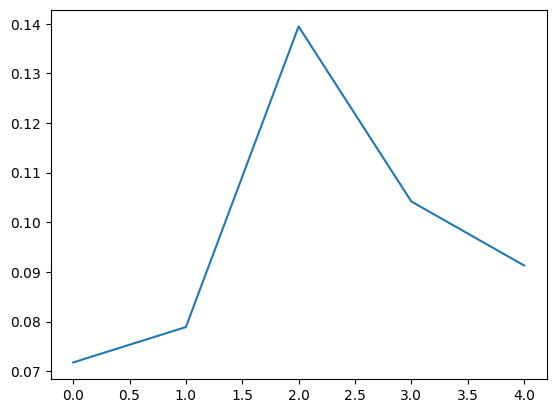

In [58]:
plt.plot(score)
plt.show()